Exploratory Data Analysis on Iris Dataset

Exploratory Data Analysis (EDA) is a technique to analyze data using some visual Techniques. With this technique, we can get detailed information about the statistical summary of the data. We will also be able to deal with the duplicates values, outliers, and also see some trends or patterns present in the dataset.

Now let's see a brief about the Iris dataset.

Iris Dataset
If you are from a data science background you all must be familiar with the Iris Dataset. If you are not then don't worry we will discuss this here.

Iris Dataset is considered as the Hello World for data science. It contains five columns namely - Petal Length, Petal Width, Sepal Length, Sepal Width, and Species Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally.

In [3]:
import pandas as pd

# Reading the CSV file
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Iris.csv")

# Printing top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Getting Information about the Dataset
We will use the shape parameter to get the shape of the dataset.

In [4]:
df.shape

(150, 6)

We can see that the dataframe contains 6 columns and 150 rows.

Now, let's also the columns and their data types. For this, we will use the info() method.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that only one column has categorical data and all the other columns are of the numeric type with non-Null entries.

Let's get a quick statistical summary of the dataset using the describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can see the count of each column along with their mean value, standard deviation, minimum and maximum values.

Checking Missing Values
We will check if our data contains any missing values or not. Missing values can occur when no information is provided for one or more items or for a whole unit. We will use the isnull() method.

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that no column as any missing value.

Note: For more information, refer Working with Missing Data in Pandas.

Checking Duplicates
Let's see if our dataset contains any duplicates or not. Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [8]:
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


We can see that there are only three unique species. Let's see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not. We will use the Series.value_counts() function. This function returns a Series containing counts of unique values. 

In [9]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

We can see that all the species contain an equal amount of rows, so we should not delete any entries.

Data Visualization
Visualizing the target column
Our target column will be the Species column because at the end we will need the result according to the species only. Let's see a countplot for species.

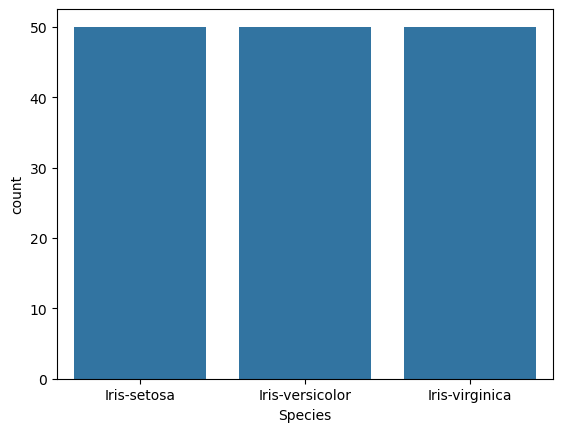

In [10]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Species', data=df, )
plt.show()

Relation between variables
We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

Example 1: Comparing Sepal Length and Sepal Width

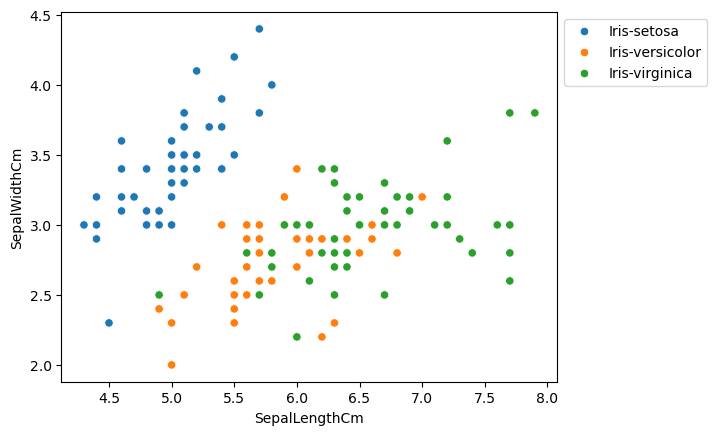

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

From the above plot, we can infer that - 

Species Setosa has smaller sepal lengths but larger sepal widths.
Versicolor Species lies in the middle of the other two species in terms of sepal length and width
Species Virginica has larger sepal lengths but smaller sepal widths.
Example 2: Comparing Petal Length and Petal Width

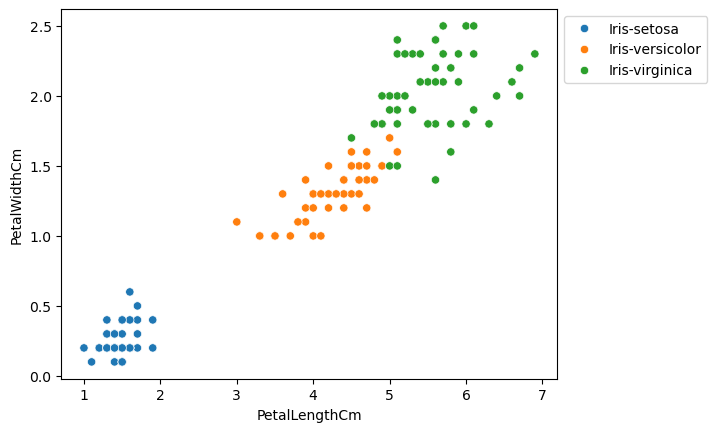

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

From the above plot, we can infer that - 

Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.
Let's plot all the column's relationships using a pairplot. It can be used for multivariate analysis.

Example:

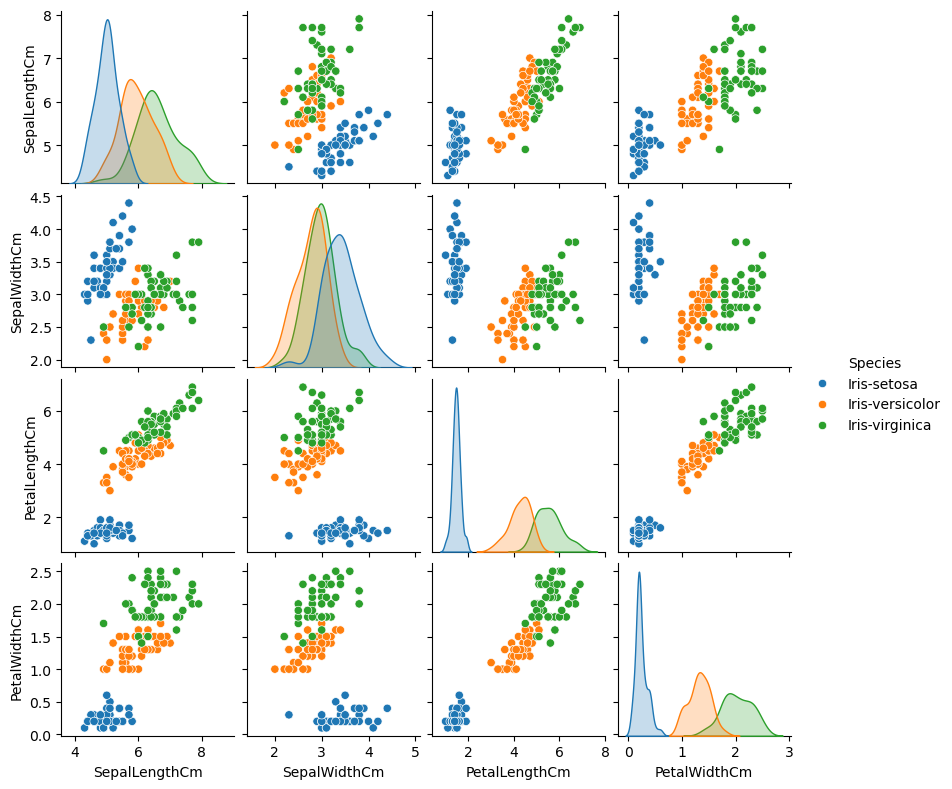

In [13]:
sns.pairplot(df.drop(['Id'], axis = 1), 
             hue='Species', height=2)

We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

Histograms
Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.

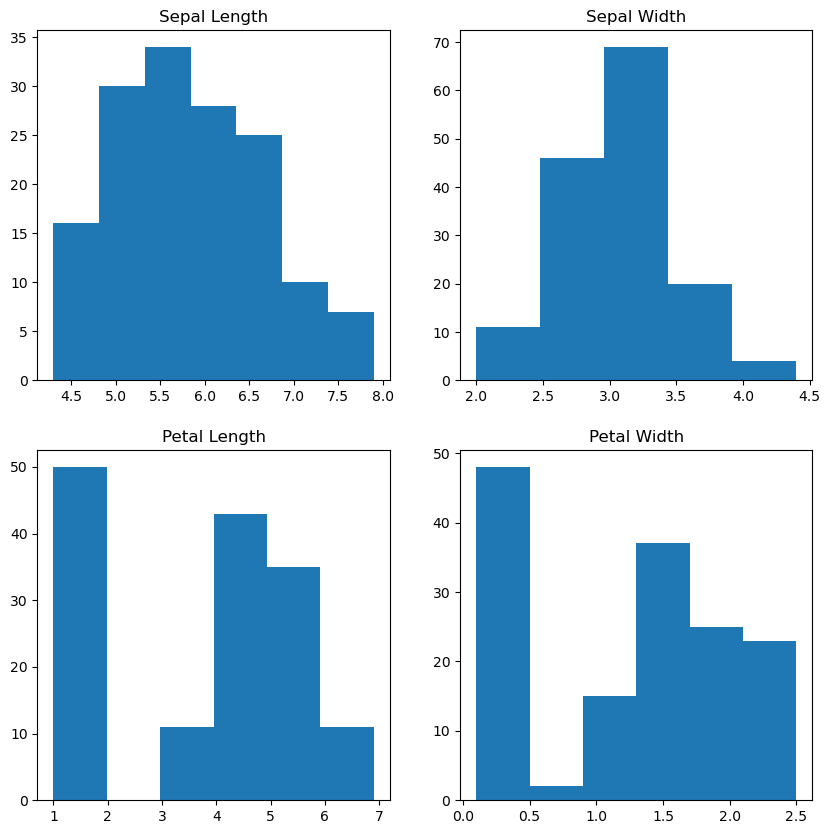

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

From the above plot, we can see that - 

The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
The highest frequency of the petal length is around 50 which is between 1 and 2
The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5
Histograms with Distplot Plot
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: 

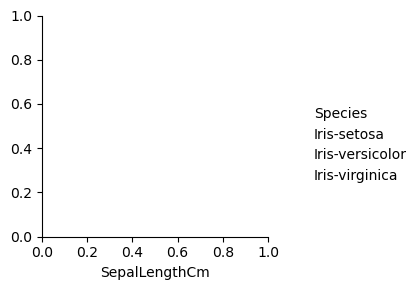

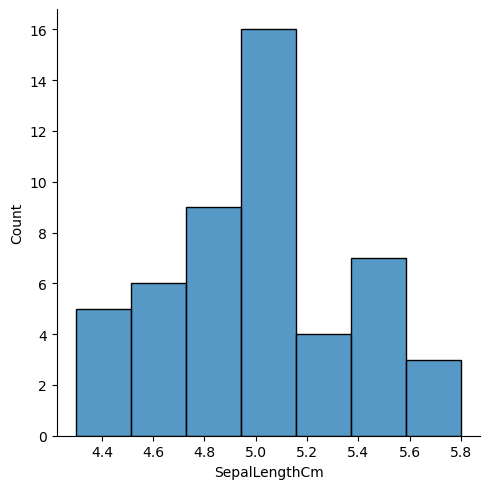

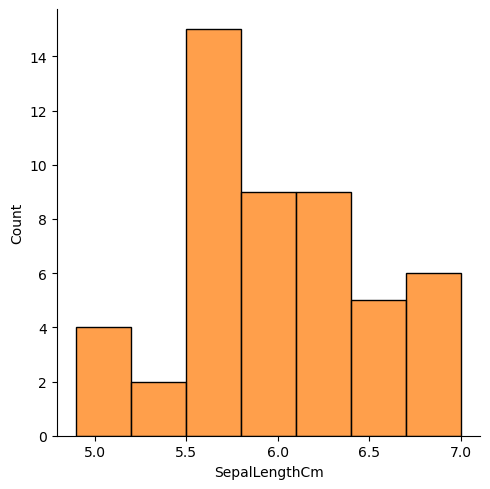

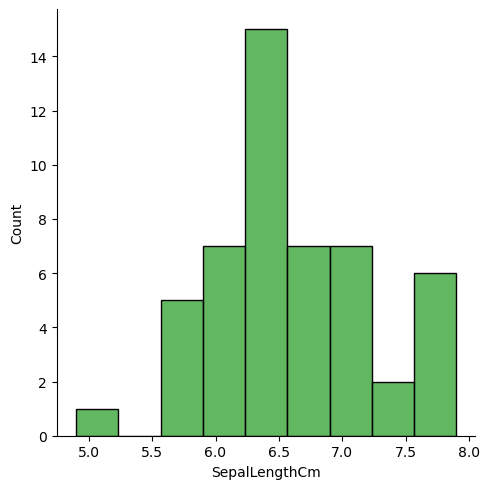

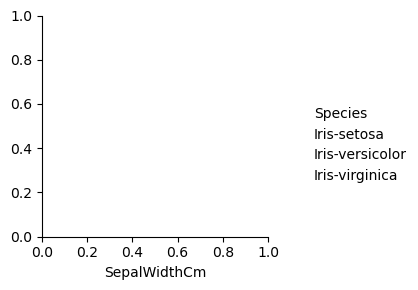

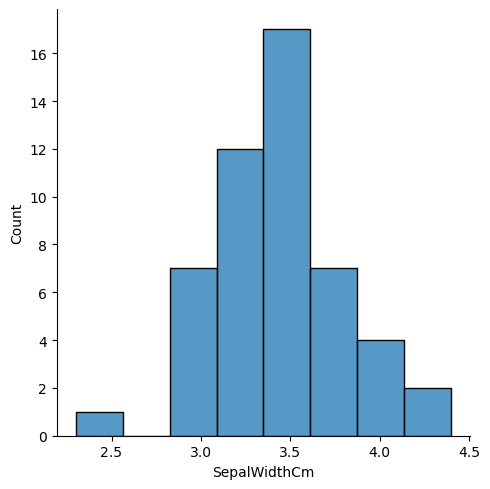

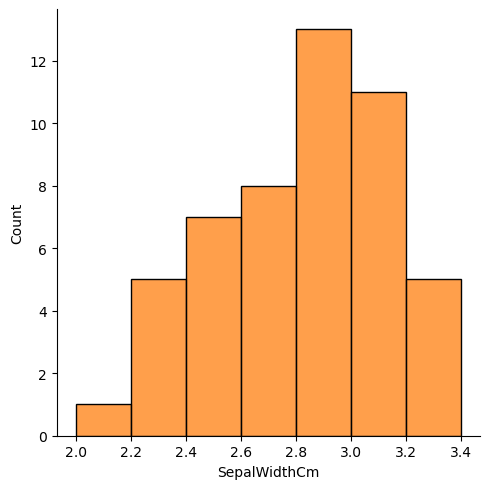

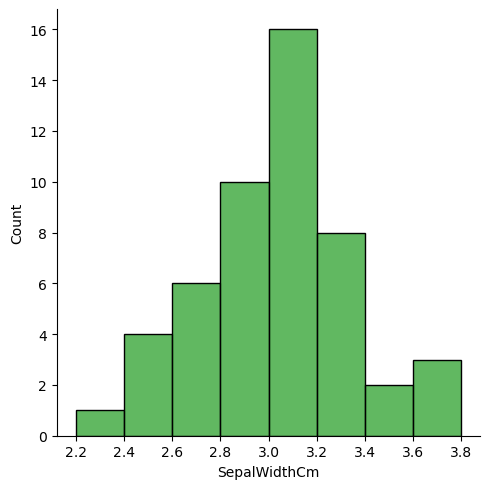

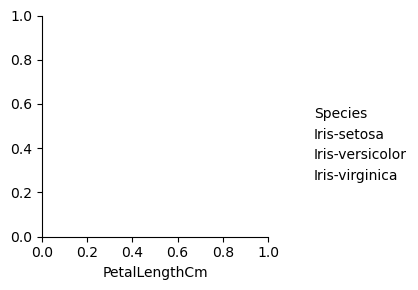

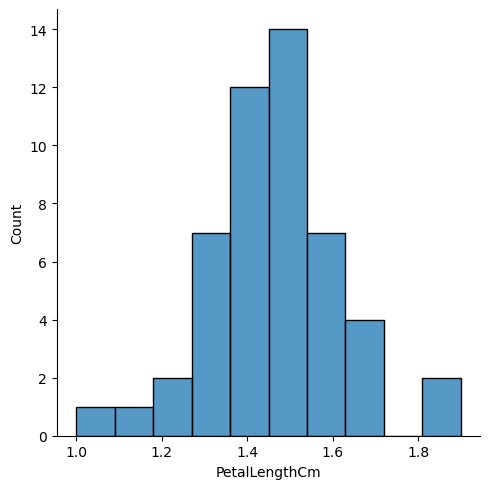

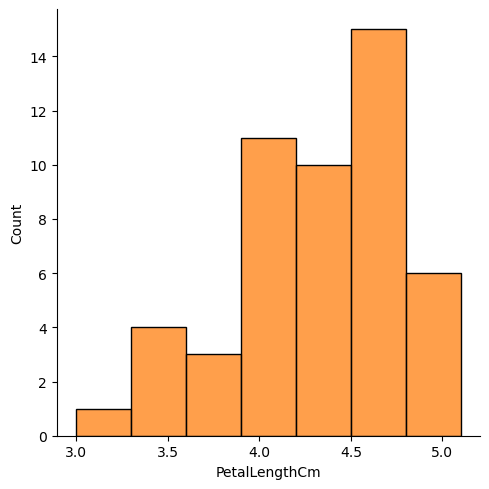

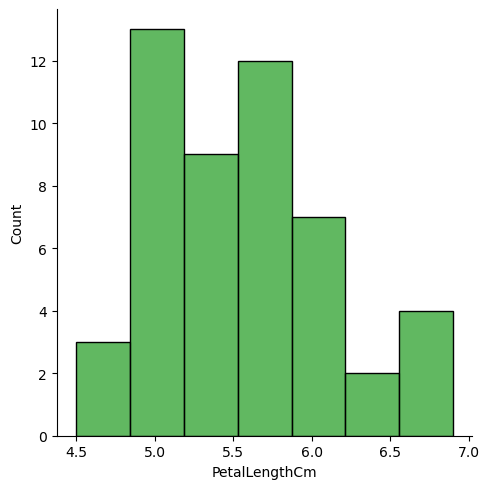

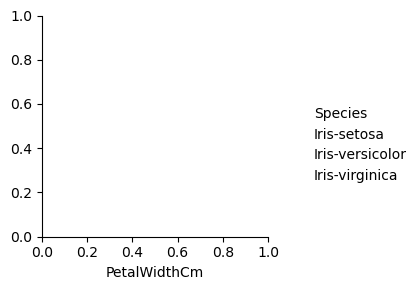

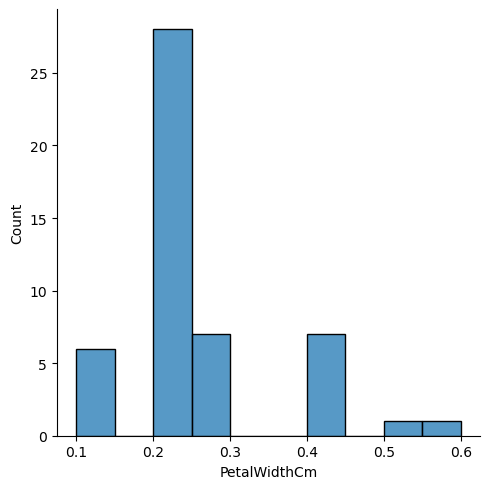

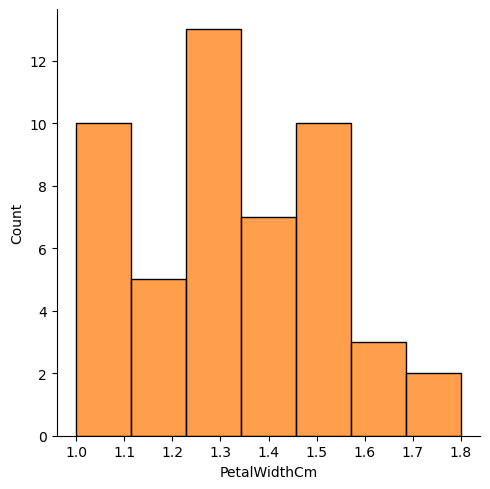

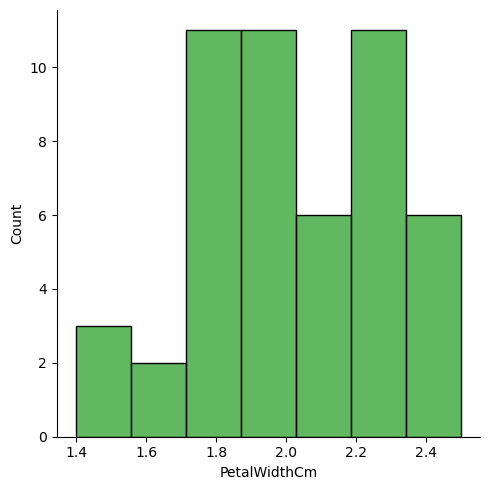

In [16]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "SepalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "SepalWidthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "PetalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "PetalWidthCm").add_legend()

plt.show()

From the above plots, we can see that - 

In the case of Sepal Length, there is a huge amount of overlapping.
In the case of Sepal Width also, there is a huge amount of overlapping.
In the case of Petal Length, there is a very little amount of overlapping.
In the case of Petal Width also, there is a very little amount of overlapping.
So we can use Petal Length and Petal Width as the classification feature.

Handling Correlation
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

Example:

In [17]:
data.select_dtypes(include=['number']).corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


Heatmaps
The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

Example:

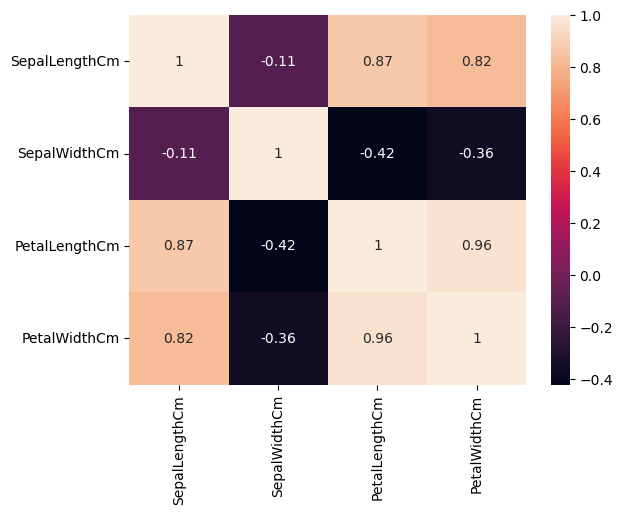

In [18]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop( 
['Id'], axis=1).drop(['Id'], axis=0), 
			annot = True); 

plt.show()

From the above graph, we can see that -

Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.
Box Plots
We can use boxplots to see how the categorical value os distributed with other numerical values.

Example:

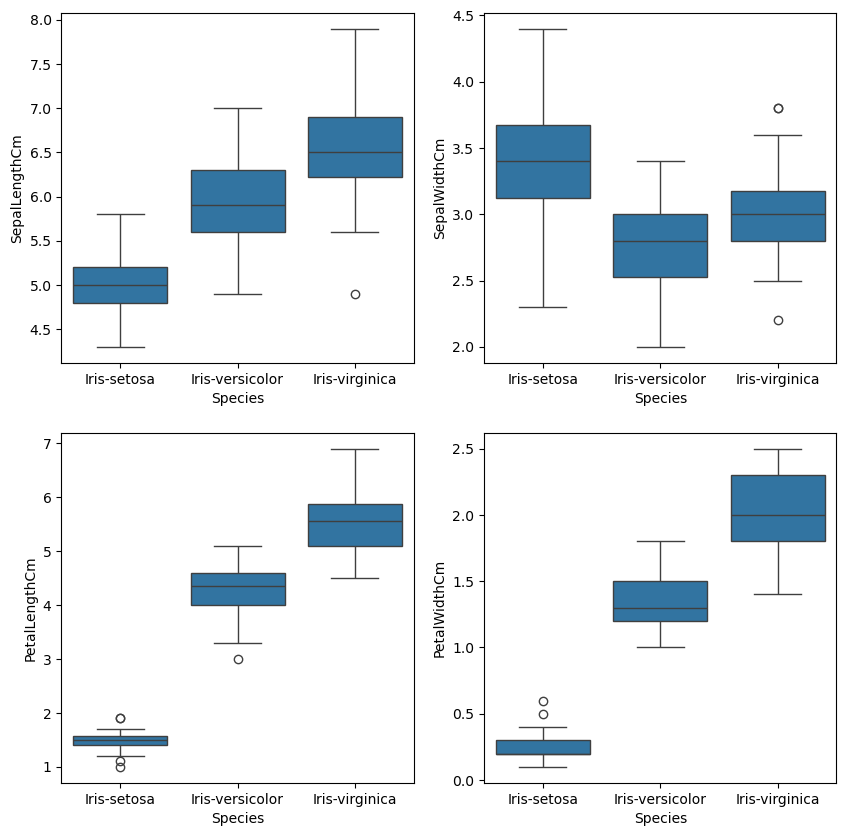

In [19]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))
    
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

From the above graph, we can see that - 

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features
Handling Outliers
An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

Let's consider the iris dataset and let's plot the boxplot for the SepalWidthCm column.

Example:

<Axes: xlabel='SepalWidthCm'>

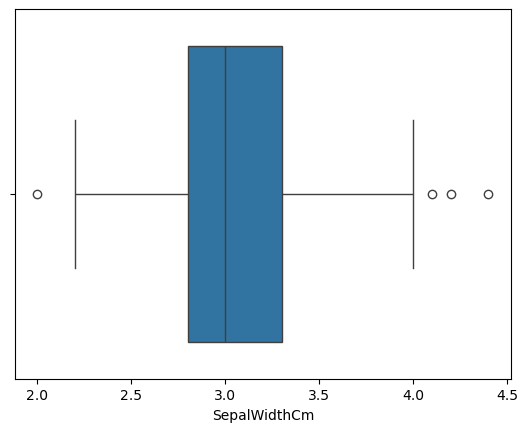

In [20]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Iris.csv")

sns.boxplot(x='SepalWidthCm', data=df)

In the above graph, the values above 4 and below 2 are acting as outliers.

Removing Outliers
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

Example: We will detect the outliers using IQR and then we will remove them. We will also draw the boxplot to see if the outliers are removed or not.

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

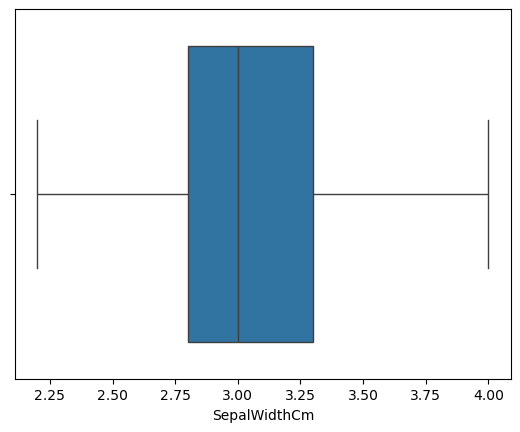

In [21]:
# Importing
import numpy as np

# Load the dataset 
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Iris.csv") 

# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
				interpolation = 'midpoint') 

Q3 = np.percentile(df['SepalWidthCm'], 75, 
				interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape) 

# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 

# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 

# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 

print("New Shape: ", df.shape) 

sns.boxplot(x='SepalWidthCm', data=df)